## Lab 9
### K-Means Clustering

Ayush Mukund Jamdar EE20B018


Here, we aim to segment an image into three sections. We shall use the K-means Clustering Algorithm. 


In [74]:
# Basic Helper Functions

# load modules
import numpy as np
from PIL import Image # for image loading and saving
from IPython.display import display
from matplotlib import pyplot as plt
import cv2

# Convert a grayscale png/jpg image to a numpy array
# of ints 0 to 255
def image2array(filename, colour=False):
    image = Image.open(filename)

    if colour:
        image = image.convert('L')
        image = image.resize((800, 500))
        # convert to black and white

    return np.array(image)

# Save a 2D numpy array as an image in jpg/png
def saveArrAsImage(image_array, filepath, file_format):
    image = Image.fromarray(image_array)
    # image.show()
    image.save(filepath, file_format)
    return

# Display a 2D numpy array as an image in the notebook
def displayImageArray(image_array):
    image = Image.fromarray(image_array)
    display(image)

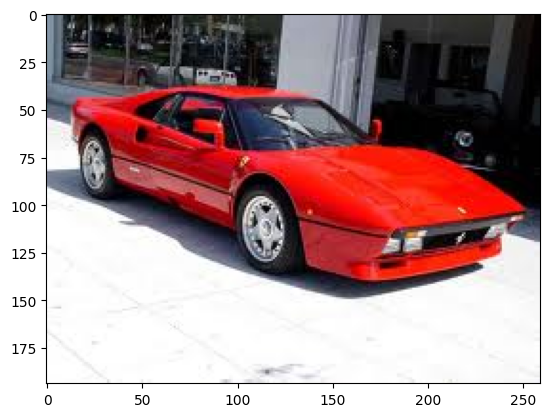

In [75]:
car_image = cv2.imread('car.png')

# Change color to RGB (from BGR)
car_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB)

plt.imshow(car_image)

The image needs to be converted to a 2D array of $N^2$ rows and 3 columns corresponding to R, G, and B. 

In [76]:
car_pixel_vals = car_image.reshape((-1, 3)).astype(np.float32)

Now we define the K-Means Algorithm for K=3 meaning that we will identify 3 clusters in the image. 

In [77]:
def get_segmented_image(image_filename, k, Niter, cluster_means_init, return_cost = False):
    
    image = cv2.imread(image_filename)

    # Change color to RGB (from BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixel_vals = image.reshape((-1, 3)).astype(np.float32)
    
    for t in range(Niter):
        # print("Iter: ", t+1)

        # calculate new cluster means
        if t == 0:
            # in the first iteration, use given means
            cluster_means = cluster_means_init 
            cluster_dict = {key: [] for key in cluster_means_init}
        else:
            cluster_means = []
            for cluster in cluster_dict:
                pixel_indices = cluster_dict[cluster]
                new_mean = np.mean(pixel_vals[pixel_indices], axis=0)
                cluster_means.append(tuple(new_mean))
            cluster_dict = {key: [] for key in cluster_means}

        # assign pixels to the nearest mean
        for i in range(len(pixel_vals)):
            # print(car_pixel_vals)
            nearest_cluster_ind = np.argmin(
                np.linalg.norm(cluster_means - pixel_vals[i], axis=1))
            # print(nearest_cluster_ind)
            cluster = cluster_means[nearest_cluster_ind]
            cluster_dict[cluster].append(i)


    segmented_array = np.zeros_like(pixel_vals)
    for cluster in cluster_dict:
        segmented_array[cluster_dict[cluster]] = cluster

    segmented_image = np.uint8(segmented_array.reshape((image.shape)))    

    if return_cost:
        # print("Calculating Cost...")
        cost = 0
        for cluster_mean in cluster_dict:
            indices = cluster_dict[cluster]
            cost += np.sum(np.linalg.norm(cluster_mean - pixel_vals[indices], axis=1))

        return segmented_image, cost
    else:
        return segmented_image


Now let's run the algorithm on the two images. 

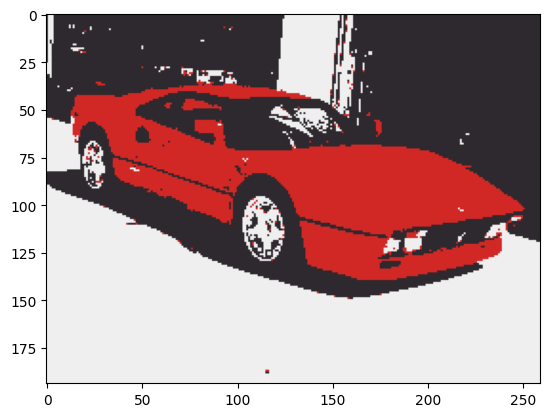

In [78]:
Niter = 5
k = 3

# intial cluster means
cluster_means_init = [
                    (255, 0, 0),
                    (0, 0, 0),
                    (255, 255, 255)
                    ]

car_segmented = get_segmented_image('car.png', k, Niter, cluster_means_init)
plt.imshow(car_segmented)

The above image is the result of 3-segment clustering on the `car` image. 

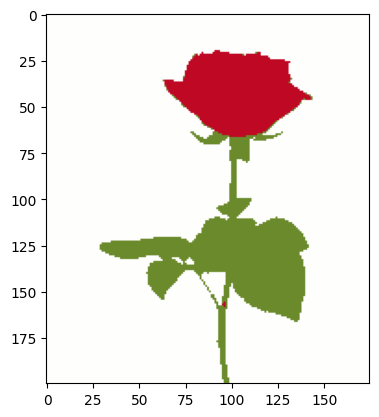

In [79]:
flower_segmented = get_segmented_image('flower.png', k, Niter, cluster_means_init)
plt.imshow(flower_segmented)

In the next section of the assignment, we will start with a random initialization of cluster means. We shall use 30 different random initializations. 

In [97]:
def assignment_b_random(filename, N=30):
    costs = []
    images = []

    for i in range(N):
        if i % 5 == 0:
            print("Iter: ", i)

        means_rand_init = [tuple(np.random.randint(0, 255, size=(3))) for j in range(3)]

        image, cost = get_segmented_image(filename, k, Niter, means_rand_init, return_cost=True)    
        # print(cost)
        costs.append(cost)
        images.append(image)

    cost_max = costs[np.argmax(costs)]
    segmented_max_cost = images[np.argmax(costs)]
    print("Max Cost = ", cost_max)
    print("Segmented Image from Max Cost = ")
    plt.imshow(segmented_max_cost)

    cost_min = costs[np.argmin(costs)]
    segmented_min_cost = images[np.argmin(costs)]
    print("Min Cost = ", cost_min)
    print("Segmented Image from Min Cost = ")
    plt.imshow(segmented_min_cost)

    return segmented_min_cost, segmented_max_cost


Iter:  0
Iter:  5


C:\Users\USER\AppData\Local\Temp\ipykernel_36984\2894141570.py:40: RuntimeWarning: invalid value encountered in cast
  segmented_image = np.uint8(segmented_array.reshape((image.shape)))


Iter:  10
Iter:  15
Iter:  20
Iter:  25
Max Cost =  13401248.1875
Segmented Image from Max Cost = 
Min Cost =  0.0
Segmented Image from Min Cost = 


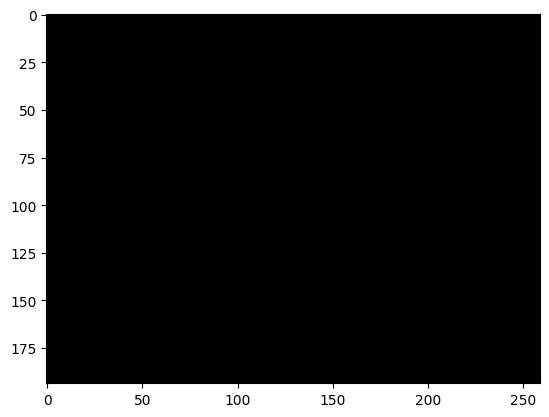

In [98]:
seg_min_cost, seg_max_cost = assignment_b_random('car.png')
plt.imshow(seg_min_cost)

The above black image corresponds to the highest cost. 

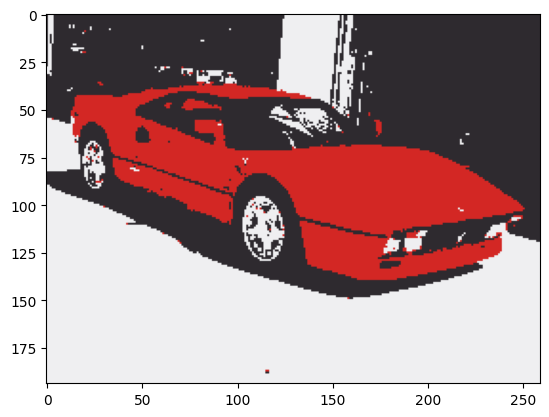

In [99]:
plt.imshow(seg_max_cost)

The above image corresponds to the least cost. 

Iter:  0


C:\Users\USER\AppData\Local\Temp\ipykernel_36984\2894141570.py:40: RuntimeWarning: invalid value encountered in cast
  segmented_image = np.uint8(segmented_array.reshape((image.shape)))


Iter:  5
Iter:  10
Iter:  15
Iter:  20
Iter:  25
Max Cost =  17757448.9375
Segmented Image from Max Cost = 
Min Cost =  0.0
Segmented Image from Min Cost = 


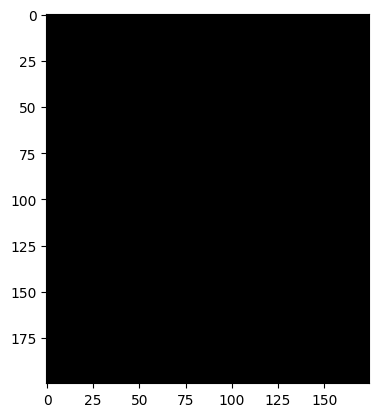

In [100]:
seg_min_cost, seg_max_cost = assignment_b_random('flower.png')
plt.imshow(seg_min_cost)

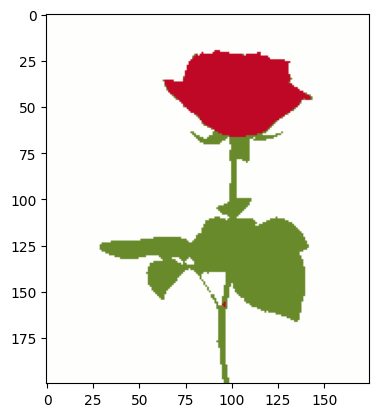

In [101]:
plt.imshow(seg_max_cost)

Hence, we have demonstrated the application of K-means Clustering using two methods for initialization. 